In [106]:
from gloria.datasets.visualization_utils import *
import pandas as pd
import os
# import skimage
from torch import nn
import seaborn as sns
import cv2
import shutil
from tqdm import tqdm

### Get Results Paths

In [107]:
paths = {
    'uniter_none': '/scratch/mcinerney.de/uniter_data/imagenome/normal_output_test/',
    'uniter_swapleftright': '/scratch/mcinerney.de/uniter_data/imagenome/swapleftright_output_test/',
    'uniter_shufflebboxes': '/scratch/mcinerney.de/uniter_data/imagenome/shufflebboxes_output_test/',
    'uniter_randsent': '/scratch/mcinerney.de/uniter_data/imagenome/randsent_output_test/',
    'uniter_randbboxes': '/scratch/mcinerney.de/uniter_data/imagenome/randbboxes_output_test/',
    'uniter_gensent': '/scratch/mcinerney.de/uniter_data/imagenome/gensent_output_test/',
    'uniter_gensentswapcond': '/scratch/mcinerney.de/uniter_data/imagenome/gensentswapcond_output_test/',

#     'original_none': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_02_23_23_29/test_outputs_0/',
#     'original_swapleftright': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_07_18_41_32/test_outputs_0/',
#     'original_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_12_05/test_outputs_0/',
#     'original_randsent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_14_16_30/test_outputs_0/',
#     'original_randbboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_41_11/test_outputs_0/',
#     'original_gensent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_14_49_57/test_outputs_0/',
#     'original_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_15_07_16/test_outputs_0/',

    'original_none': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_01_35_54/test_outputs_0/',
    'original_swapleftright': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_02_10_10/test_outputs_0/',
    'original_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_02_41_44/test_outputs_0/',
    'original_randsent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_03_09_57/test_outputs_0/',
    'original_randbboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_03_40_21/test_outputs_0/',
    'original_gensent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_04_02_19/test_outputs_0/',
    'original_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_04_22_25/test_outputs_0/',
    
    'retrained_none': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_11_04_51/test_outputs_0/',
    'retrained_swapleftright': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_11_34_26/test_outputs_0/',
    'retrained_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_12_06_39/test_outputs_0/',
    'retrained_randsent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_12_32_50/test_outputs_0/',
    'retrained_randbboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_13_08_22/test_outputs_0/',
    'retrained_gensent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_13_37_57/test_outputs_0/',
    'retrained_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_14_09_05/test_outputs_0/',

    'retrainedabnormal_none': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_19_56_20/test_outputs_0/',
    'retrainedabnormal_swapleftright': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_21_09_24/test_outputs_0/',
    'retrainedabnormal_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_22_15_17/test_outputs_0/',
    'retrainedabnormal_randsent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_23_16_57/test_outputs_0/',
    'retrainedabnormal_randbboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_18_00_43_51/test_outputs_0/',
    'retrainedabnormal_gensent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_18_01_26_48/test_outputs_0/',
    'retrainedabnormal_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_18_02_41_39/test_outputs_0/',

    'retrainedwordmasked_none': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_11_03_03/test_outputs_0/',
    'retrainedwordmasked_swapleftright': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_12_03_55/test_outputs_0/',
    'retrainedwordmasked_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_13_22_11/test_outputs_0/',
    'retrainedwordmasked_randsent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_14_58_32/test_outputs_0/',
    'retrainedwordmasked_randbboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_16_18_26/test_outputs_0/',
    'retrainedwordmasked_gensent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_03_45_22/test_outputs_0/',
    'retrainedwordmasked_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_05_00_50/test_outputs_0/',

    'retrainedclinicalmasked_none': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_20_48_07/test_outputs_0/',
    'retrainedclinicalmasked_swapleftright': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_03_07_11/test_outputs_0/',
    'retrainedclinicalmasked_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_03_45_01/test_outputs_0/',
    'retrainedclinicalmasked_randsent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_04_17_59/test_outputs_0/',
    'retrainedclinicalmasked_randbboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_05_06_41/test_outputs_0/',
    'retrainedclinicalmasked_gensent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_05_49_39/test_outputs_0/',
    'retrainedclinicalmasked_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_06_21_45/test_outputs_0/',

    'retrainednoattn_none': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_20_09_10/test_outputs_0/',
    'retrainednoattn_swapleftright': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_20_38_03/test_outputs_0/',
    'retrainednoattn_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_21_06_16/test_outputs_0/',
    'retrainednoattn_randsent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_21_33_38/test_outputs_0/',
    'retrainednoattn_randbboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_22_11_49/test_outputs_0/',
    'retrainednoattn_gensent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_22_46_39/test_outputs_0/',
    'retrainednoattn_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_23_14_46/test_outputs_0/',

    'retrainedsup_none': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_20_13_25/test_outputs_0/',
    'retrainedsup_swapleftright': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_20_54_29/test_outputs_0/',
    'retrainedsup_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_21_26_04/test_outputs_0/',
    'retrainedsup_randsent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_21_53_29/test_outputs_0/',
    'retrainedsup_randbboxes': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_22_21_36/test_outputs_0/',
    'retrainedsup_gensent': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_22_50_23/test_outputs_0/',
    'retrainedsup_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs9/output/gloria_pretrain_1.0/2022_05_17_23_18_51/test_outputs_0/',

    'retrainedrandsent_none': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_02_23_27_17/test_outputs_0/',
    'retrainedrandsent_swapleftright': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_08_10_43_08/test_outputs_0/',
    'retrainedrandsent_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_22_14/test_outputs_0/',
    'retrainedrandsent_randsent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_14_45_27/test_outputs_0/',
    'retrainedrandsent_randbboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_44_43/test_outputs_0/',
    'retrainedrandsent_gensent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_14_58_31/test_outputs_0/',
    'retrainedrandsent_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_15_12_23/test_outputs_0/',
}


In [108]:
dfs = {k: pd.read_csv(os.path.join(path, 'sentences.csv')) for k, path in paths.items()}

### Postprocess Dataframes

#### Get mean report bboxes iou for creating most diverse report bboxes subset

In [109]:
def get_mean_report_ious(df):
    mean_ious = []
    image_shape = (224, 224)
    report_to_mean_iou = {}
    for i, row in tqdm(df.iterrows(), total=len(df)):
        if row.dicom_id in report_to_mean_iou.keys():
            mean_report_iou = report_to_mean_iou[row.dicom_id]
        else:
            report_rows = df[df.dicom_id == row.dicom_id]
            if len(report_rows) > 1:
                report_ious = []
                for a in range(len(report_rows) - 1):
                    row1 = report_rows.iloc[a]
                    label1 = sent_bboxes_to_segmentation_label(image_shape, eval(row1.bboxes))
                    for b in range(a + 1, len(report_rows)):
                        row2 = report_rows.iloc[b]
                        label2 = sent_bboxes_to_segmentation_label(image_shape, eval(row2.bboxes))
                        iou = ((label1 == 1) & (label2 == 1)).float().sum() / \
                              ((label1 == 1) | (label2 == 1)).float().sum()
                        report_ious.append(iou)
                mean_report_iou = sum(report_ious) / len(report_ious)
            else:
                mean_report_iou = None
            report_to_mean_iou[row.dicom_id] = mean_report_iou
        mean_ious.append(mean_report_iou)
    return mean_ious
dfs['original_none']['mean_report_ious'] = get_mean_report_ious(dfs['original_none'])

100%|██████████| 2496/2496 [00:06<00:00, 358.15it/s]


In [110]:
new_df = dfs['original_none'][~dfs['original_none'].auroc.isna() & ~dfs['original_none'].mean_report_ious.isna()]
threshold = new_df.sort_values('mean_report_ious')[:int(len(new_df) * .1)].mean_report_ious.max()
new_df = new_df[new_df.mean_report_ious <= threshold]
dicom_sent_id_set = set(new_df.dicom_sent_id.tolist())
most_diverse_report_bboxes_selector = lambda row: row.dicom_sent_id in dicom_sent_id_set

#### Get kl divergence with random sentence

In [111]:
def get_kl_divergence_with_random_sentence(df, path, path_random):
    kls = []
    for i, row in tqdm(df.iterrows(), total=len(df)):
        attn = torch.tensor(np.load(os.path.join(path, 'attn', row.dicom_sent_id + '.npy')))
        attn_random = torch.tensor(np.load(os.path.join(path_random, 'attn', row.dicom_sent_id + '.npy')))
        kl = ((attn_random * (torch.log(attn_random) - torch.log(attn))).sum() +
              (attn * (torch.log(attn) - torch.log(attn_random))).sum()) / 2
        kls.append(kl.item())
    return kls
for k in ['original', 'retrained', 'retrainedwordmasked', 'retrainedclinicalmasked', 'retrainedrandsent',
          'retrainedabnormal', 'retrainednoattn', 'retrainedsup', 'uniter']:
    dfs['%s_none' % k]['attn_kl_with_randsent'] = get_kl_divergence_with_random_sentence(
        dfs['%s_none' % k], paths['%s_none' % k], paths['%s_randsent' % k])


100%|██████████| 2507/2507 [00:08<00:00, 282.81it/s]


#### Add isabnormal

In [112]:
def get_isabnormal(df):
    abnormal_selector = RowLabelAndContextSelector(contains={('abnormal', 'yes')})
    return df.progress_apply(abnormal_selector, axis=1)


for k in ['original', 'retrained', 'retrainedwordmasked', 'retrainedclinicalmasked', 'retrainedrandsent',
          'retrainedabnormal', 'retrainednoattn', 'retrainedsup', 'uniter']:
    dfs['%s_none' % k]['isabnormal'] = get_isabnormal(dfs['%s_none' % k])

100%|██████████| 2507/2507 [00:00<00:00, 15320.88it/s]


### Plot Histograms

### Get Localization Scores

In [113]:
one_lung_selector = OrSelector(
             RowBBoxSelector(contains={'left lung'}, does_not_contain={'right lung'}),
             RowBBoxSelector(contains={'right lung'}, does_not_contain={'left lung'})
         )
abnormal_selector = RowLabelAndContextSelector(contains={('abnormal', 'yes')})
selectors = {'all': None, 'abnormal': abnormal_selector, 'one_lung': one_lung_selector,
             'most_diverse_report_bboxes': most_diverse_report_bboxes_selector}
example_df = dfs['original_none']
selector_counts = {name: len(example_df[example_df.apply(selector, axis=1)])
                   if selector is not None else len(example_df)
                   for name, selector in selectors.items()}
score_rows = []
ps = [.05, .1, .2, .3]
for k, df in dfs.items():
    score_rows.append({'model': k})
    for name, selector in selectors.items():
        rows = df[df.apply(selector, axis=1)] if selector is not None else df
        score_rows[-1]['%s_auroc' % name] = rows.auroc.mean()
        score_rows[-1]['%s_avg_precision' % name] = rows.avg_precision.mean()
        if 'attn_kl_with_randsent' in rows.keys():
            score_rows[-1]['%s_attn_kl_with_randsent' % name] = rows.attn_kl_with_randsent.mean()
        for p in ps:
            score_rows[-1]['%s_precision_at_%f' % (name, p)] = rows['precision_at_%f' % p].mean() \
                if 'precision_at_%f' % p in rows.keys() else None
            score_rows[-1]['%s_recall_at_%f' % (name, p)] = rows['recall_at_%f' % p].mean() \
                if 'recall_at_%f' % p in rows.keys() else None
            score_rows[-1]['%s_f1_at_%f' % (name, p)] = rows['f1_at_%f' % p].mean() \
                if 'f1_at_%f' % p in rows.keys() else None
            score_rows[-1]['%s_iou_at_%f' % (name, p)] = rows['iou_at_%f' % p].mean() \
                if 'iou_at_%f' % p in rows.keys() else None
    #     info = path_and_rows_to_info(path, rows=rows)
    #     plot_info(get_attn_overlay, info, path=path)
#     plt.close()
scores_df = pd.DataFrame(score_rows)
new_rows = []
for i, row in scores_df.iterrows():
    if row['model'].split('_')[1].startswith('gensent'):
        base_model = row['model'].split('_')[0] + '_gensent'
    else:
        base_model = row['model'].split('_')[0] + '_none'
    base_model_row = scores_df[scores_df.model == base_model].iloc[0]
    for name, selector in selectors.items():
        for k in (
                ['avg_precision', 'auroc'] +
                ['precision_at_%f' % p for p in ps] +
                ['iou_at_%f' % p for p in ps]):
            row['%s_%s_delta' % (name, k)] = row['%s_%s' % (name, k)] - base_model_row['%s_%s' % (name, k)]
    new_rows.append(row)
scores_df = pd.DataFrame(new_rows)
print('val counts', selector_counts)
scores_df

val counts {'all': 2496, 'abnormal': 748, 'one_lung': 285, 'most_diverse_report_bboxes': 252}


,model,all_auroc,all_avg_precision,all_attn_kl_with_randsent,all_precision_at_0.050000,all_recall_at_0.050000,all_f1_at_0.050000,all_iou_at_0.050000,all_precision_at_0.100000,all_recall_at_0.100000,...,most_diverse_report_bboxes_avg_precision_delta,most_diverse_report_bboxes_auroc_delta,most_diverse_report_bboxes_precision_at_0.050000_delta,most_diverse_report_bboxes_precision_at_0.100000_delta,most_diverse_report_bboxes_precision_at_0.200000_delta,most_diverse_report_bboxes_precision_at_0.300000_delta,most_diverse_report_bboxes_iou_at_0.050000_delta,most_diverse_report_bboxes_iou_at_0.100000_delta,most_diverse_report_bboxes_iou_at_0.200000_delta,most_diverse_report_bboxes_iou_at_0.300000_delta
0,uniter_none,0.849221,0.685733,0.037789,0.630800,0.271269,0.324656,0.025707,0.666557,0.409839,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,uniter_swapleftright,0.848435,0.686307,NaN,0.630292,0.275627,0.330181,0.025821,0.665622,0.408569,...,-0.001235,-0.003361,-0.018254,-0.022989,-0.008245,-0.007000,0.009177,-0.003980,0.005889,-0.006809
2,uniter_shufflebboxes,0.847025,0.679245,NaN,0.619747,0.268198,0.320914,0.026567,0.656247,0.403274,...,0.022391,0.006215,-0.008549,-0.010858,0.027929,0.031676,0.018331,-0.003433,0.007741,0.001002
3,uniter_randsent,0.845240,0.676891,NaN,0.613587,0.258786,0.312889,0.024851,0.653489,0.392285,...,-0.012952,-0.007405,-0.031729,-0.037467,-0.003838,-0.001820,0.002962,-0.005318,-0.012469,-0.004803
4,uniter_randbboxes,0.701941,0.492305,NaN,0.431189,0.202631,0.232485,0.013836,0.475180,0.311434,...,-0.085008,-0.122160,-0.102575,-0.074839,-0.021063,0.008082,-0.016025,-0.052656,-0.072909,-0.071775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,retrainedrandsent_shufflebboxes,0.391982,0.307614,NaN,0.153366,0.330090,0.167743,0.003645,0.155219,0.336153,...,0.001751,-0.002485,-0.001496,-0.003797,-0.002954,0.000762,0.000079,-0.000786,-0.001272,-0.000233
59,retrainedrandsent_randsent,0.389982,0.306510,NaN,0.146467,0.314292,0.159300,0.003348,0.150156,0.319982,...,0.002022,0.004225,0.004473,0.000904,0.002665,0.003878,0.000171,-0.000723,0.000516,0.001988
60,retrainedrandsent_randbboxes,0.419162,0.303315,NaN,0.159990,0.329713,0.163861,0.005057,0.159007,0.336698,...,0.080303,0.016584,0.071391,0.060033,0.062265,0.078936,0.004135,0.005258,0.009960,0.022777
61,retrainedrandsent_gensent,0.360932,0.291510,NaN,0.086785,0.106949,0.059782,0.004525,0.089427,0.114282,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Get Latex tables for Localization Scores

In [114]:
def get_latex_table_localization_scores(prefixes, scores_df, deltas=True, metrics=['auroc', 'avg_precision', 'precision', 'iou']):
    latex_table = ''
    model_names = {'original': 'GLoRIA', 'retrained': 'Retrained',
                   'retrainedabnormal': 'Retrained w/ Abnormal',
                   'retrainedwordmasked': 'Retrained w/ Word Masking',
                   'retrainedclinicalmasked': 'Retrained w/ Clinical Masking',
                   'retrainednoattn': 'Retrained w/ \'No Attn\' Token',
                   'retrainedsup': 'Retrained and 30-shot Finetuned',
                   'retrainedrandsent': 'Retrained w/ Rand Sents',
                   'uniter': 'UNITER'}
    augmentation_names = {'none': 'Base', 'randsent': 'Random Sentences',
                          'shufflebboxes': 'Shuffle Bboxes', 'randbboxes': 'Random Bboxes',
                          'swapleftright': 'Swap Left Right',
                          'gensent': 'Synthetic Sentences',
                          'gensentswapcond': 'Synth w/ Swapped Conditions'}
    for i, row in scores_df.iterrows():
        formatted_row_scores = []
        augmentation = augmentation_names[row.model.split('_')[-1]]
        if not deltas and not (augmentation == 'Base' or augmentation == 'Synthetic Sentences'):
            continue
        for name in prefixes:
            if augmentation == 'Base' or augmentation == 'Synthetic Sentences':
                if 'auroc' in metrics:
                    formatted_row_scores.append(row['%s_auroc' % name])
                if 'avg_precision' in metrics:
                    formatted_row_scores.append(row['%s_avg_precision' % name])
                if 'precision' in metrics:
                    formatted_row_scores.append(
                        '%.2f/%.2f/%.2f' % tuple(row['%s_precision_at_%f' % (name, p)] * 100 for p in [.05, .1, .3]))
                if 'iou' in metrics:
                    formatted_row_scores.append(
                        '%.2f/%.2f/%.2f' % tuple(row['%s_iou_at_%f' % (name, p)] * 100 for p in [.05, .1, .3]))
            else:
                if 'auroc' in metrics:
                    formatted_row_scores.append(
                        ('+' if row['%s_auroc_delta' % name] > 0 else '-') +
                        '%.2f' % abs(row['%s_auroc_delta' % name] * 100))
                if 'avg_precision' in metrics:
                    formatted_row_scores.append(
                        ('+' if row['%s_avg_precision_delta' % name] > 0 else '-') +
                        '%.2f' % abs(row['%s_avg_precision_delta' % name] * 100))
                if 'precision' in metrics:
                    formatted_row_scores.append(
                        '%s/%s/%s' %
                        tuple(
                            ('+' if row['%s_precision_at_%f_delta' % (name, p)] > 0 else '-') +
                            ('%.2f' % abs(row['%s_precision_at_%f_delta' % (name, p)] * 100))
                            for p in [.05, .1, .3])
                    )
                if 'iou' in metrics:
                    formatted_row_scores.append(
                        '%s/%s/%s' %
                        tuple(
                            ('+' if row['%s_iou_at_%f_delta' % (name, p)] > 0 else '-') +
                            ('%.2f' % abs(row['%s_iou_at_%f_delta' % (name, p)] * 100))
                            for p in [.05, .1, .3])
                    )
        if augmentation == 'Synthetic Sentences':
            latex_table += '\cline{2-6}\n'
        if augmentation == 'Base':
            latex_table += '\hline\n'
            model = model_names['_'.join(row.model.split('_')[:-1])]
            model = '\multirow{' + ('7' if deltas else '2') + '}{*}{' + model + '}'
        else:
            model = ''
        formatted_row_scores = '%s & %s & ' % (model, augmentation) + ' & '.join(
            ['%.2f' % (s * 100) if isinstance(s, float) else str(s) for s in formatted_row_scores])
        latex_table += formatted_row_scores + ' \\\\\n'
    print(latex_table)

# print('all')
# get_latex_table_localization_scores(['all'], scores_df)
# print('one_lung')
# get_latex_table_localization_scores(['one_lung'], scores_df, deltas=False)
# print('abnormal')
# get_latex_table_localization_scores(['abnormal'], scores_df, deltas=False)
# print('most_diverse_report_bboxes')
# get_latex_table_localization_scores(['most_diverse_report_bboxes'], scores_df, deltas=False)
get_latex_table_localization_scores(['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'], scores_df, deltas=False, metrics=['precision'])
get_latex_table_localization_scores(['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'], scores_df, deltas=False, metrics=['iou'])


\hline
\multirow{2}{*}{UNITER} & Base & 63.08/66.66/63.82 & 60.16/63.33/58.51 & 47.73/47.62/45.97 & 50.83/52.21/46.34 \\
\cline{2-6}
 & Synthetic Sentences & 63.18/66.59/63.86 & 61.69/63.96/58.69 & 47.74/47.98/45.96 & 49.68/50.12/46.04 \\
\hline
\multirow{2}{*}{GLoRIA} & Base & 58.56/59.20/54.98 & 53.63/54.60/51.57 & 42.70/43.57/39.89 & 41.00/41.48/37.90 \\
\cline{2-6}
 & Synthetic Sentences & 58.70/58.82/55.23 & 57.46/56.77/51.09 & 50.53/47.57/39.18 & 42.80/42.37/38.51 \\
\hline
\multirow{2}{*}{Retrained} & Base & 34.08/37.81/40.04 & 32.82/33.56/35.18 & 25.63/26.73/27.86 & 26.05/26.35/27.81 \\
\cline{2-6}
 & Synthetic Sentences & 34.12/37.08/39.61 & 29.32/31.86/34.81 & 22.00/25.58/27.95 & 25.76/26.21/27.64 \\
\hline
\multirow{2}{*}{Retrained w/ Abnormal} & Base & 42.95/33.30/39.20 & 48.32/37.29/36.36 & 40.43/30.22/28.08 & 34.69/25.58/27.47 \\
\cline{2-6}
 & Synthetic Sentences & 35.11/26.45/37.95 & 33.62/23.35/36.04 & 25.90/16.99/27.77 & 26.31/19.12/27.06 \\
\hline
\multirow{2}{*}{Ret

### Entropy

In [115]:
model_names = {'original': 'GLoRIA', 'retrained': 'Retrained',
               'retrainedabnormal': 'Retrained w/ Abnormal',
               'retrainedwordmasked': 'Retrained w/ Word Masking',
               'retrainedclinicalmasked': 'Retrained w/ Clinical Masking',
               'retrainednoattn': 'Retrained w/ \'No Attn\' Token',
               'retrainedsup': 'Retrained and 30-shot Finetuned',
               'retrainedrandsent': 'Retrained w/ Rand Sents',
               'uniter': 'UNITER'}
models = ['uniter_none', 'original_none', 'retrained_none', 'retrainedwordmasked_none',
          'retrainedabnormal_none',
          'retrainednoattn_none', 'retrainedsup_none',
          'retrainedrandsent_none']
subset_names = {
    'all': 'All',
    'abnormal': 'Abnormal',
    'one_lung': 'One Lung',
    'most_diverse_report_bboxes': 'Most Diverse Report BBoxes'
}
ks = list(selectors.keys())
latex_entropy_table = 'Model & ' + ' & '.join([subset_names[k] for k in ks]) + '\\\\\n'
latex_entropy_table += '\hline\n'
for model in models:
    entropies = []
    for k in ks:
        selector = selectors[k]
        df = dfs[model]
        if selector is not None:
            df = df[df.apply(selector, axis=1)]
        entropies.append(df.attn_entropy.mean())
    latex_entropy_table += model_names[model.split('_')[0]] + ' & ' + ' & '.join(['%.3f' % e for e in entropies]) + '\\\\\n'
print(latex_entropy_table)


Model & All & Abnormal & One Lung & Most Diverse Report BBoxes\\
\hline
UNITER & 1.777 & 1.668 & 1.644 & 1.721\\
GLoRIA & 5.828 & 5.841 & 5.833 & 5.822\\
Retrained & 5.857 & 5.863 & 5.872 & 5.862\\
Retrained w/ Word Masking & 5.841 & 5.848 & 5.858 & 5.846\\
Retrained w/ Abnormal & 5.803 & 5.816 & 5.825 & 5.806\\
Retrained w/ 'No Attn' Token & 5.849 & 5.855 & 5.861 & 5.856\\
Retrained and 30-shot Finetuned & 5.677 & 5.729 & 5.748 & 5.692\\
Retrained w/ Rand Sents & 5.889 & 5.889 & 5.889 & 5.889\\



### Plot Deltas

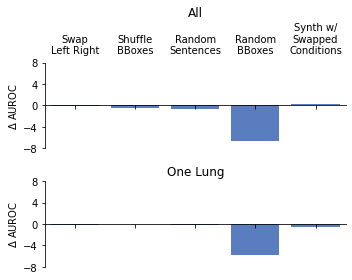

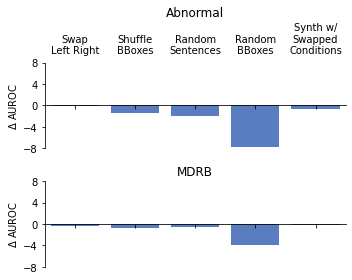

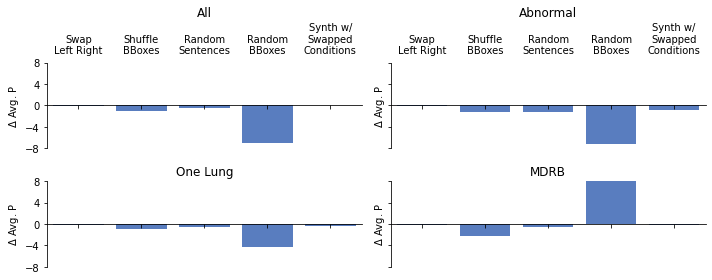

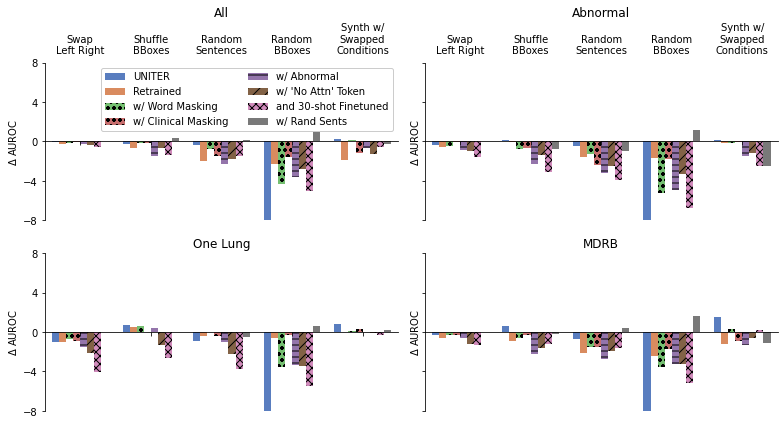

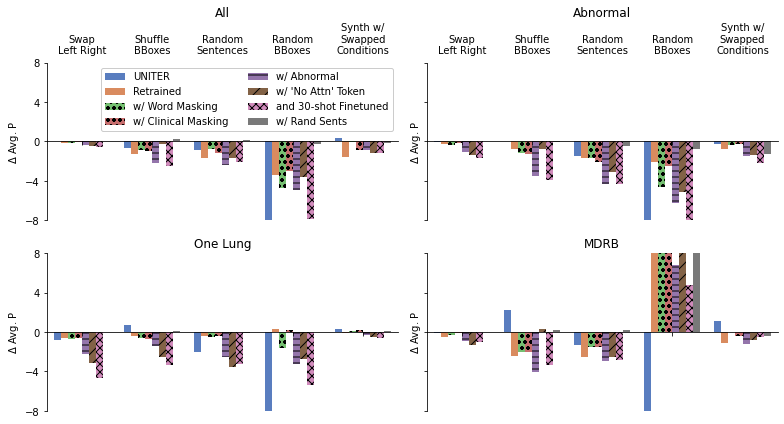

In [143]:
from matplotlib import rc
rc('text', usetex=False)
def get_delta_plots(scores_df, perturbations, subsets, models, shape=(1, 1), indices=(0), size=4,
                    figsize=None, bbox_to_anchor=None, metric='auroc'):
    model_names = {'original': 'GLoRIA', 'retrained': 'Retrained',
                   'retrainedabnormal': 'w/ Abnormal',
                   'retrainedwordmasked': 'w/ Word Masking',
                   'retrainedclinicalmasked': 'w/ Clinical Masking',
                   'retrainednoattn': 'w/ \'No Attn\' Token',
                   'retrainedsup': 'and 30-shot Finetuned',
                   'retrainedrandsent': 'w/ Rand Sents',
                   'uniter': 'UNITER'}
    perturbation_names = {'randsent': 'Random\nSentences',
                          'shufflebboxes': 'Shuffle\nBBoxes', 'randbboxes': 'Random\nBBoxes',
                          'swapleftright': 'Swap\nLeft Right',
                          'gensentswapcond': 'Synth w/\nSwapped\nConditions'}
    subset_names = {
        'all': 'All',
        'abnormal': 'Abnormal',
        'one_lung': 'One Lung',
        'most_diverse_report_bboxes': 'MDRB'
    }
    metric_names = {
        'auroc': 'AUROC',
        'avg_precision': 'Avg. P',
    }
    bar_width = 1 / (len(models) + 1)
#     tic_positions = [i + (bar_width * (len(models) - 1) / 2) for i in range(len(perturbations))]
    tic_positions = [i - bar_width for i in range(len(perturbations))]
    figsize = (size * len(subsets) * 1.05, size) if figsize is None else figsize
    fig, axs = plt.subplots(shape[0], shape[1], figsize=figsize, sharey=True, tight_layout=True, sharex=True)
    if shape[0] > 1 and shape[1] > 1:
#         remove_y_axis = [x > 0 for y, x in indices]
        remove_x_axis = [y < shape[0] - 1 for y, x in indices]
    elif shape[0] > 1:
#         remove_y_axis = [False for y in indices]
        remove_x_axis = [y < shape[0] - 1 for y in indices]
    elif shape[1] > 1:
#         remove_y_axis = [x > 0 for x in indices]
        remove_x_axis = [False for x in indices]
    remove_y_axis = [False] * len(indices)
    for a, subset in enumerate(subsets):
#         for b, model in enumerate(models):
#             positions = [i - .5 + (b * bar_width) for i in range(len(perturbations))]
#             ys = []
#             for p in perturbations:
#                 rows = scores_df[scores_df.model == (model + '_' + p)]
#                 ys.append(rows.iloc[0][subset + '_auroc_delta'] * 100)
#             axs[indices[a]].set_title(subset_names[subset])
#             axs[indices[a]].spines['bottom'].set_position('zero')
#             axs[indices[a]].spines['right'].set_color('none')
#             axs[indices[a]].spines['top'].set_color('none')
#             axs[indices[a]].bar(positions, ys, width=bar_width,
#                                 tick_label=[perturbation_names[p] for p in perturbations],
#                                 label=model_names[model])
#             axs[indices[a]].plot([-1, 4], [0, 0], '--', c='black')
#             axs[indices[a]].tick_params(axis="x", labeltop=True, labelbottom=False)
#             axs[indices[a]].set_xticks(tic_positions)
#             axs[indices[a]].set_xticklabels([perturbation_names[p] for p in perturbations])
#             if a == len(subsets) - 1 and len(models) > 1:
#                 axs[indices[a]].legend(bbox_to_anchor=bbox_to_anchor)
        df_rows = []
        for b, model in enumerate(models):
            for p in perturbations:
                rows = scores_df[scores_df.model == (model + '_' + p)]
                df_rows.append({'Model': model_names[model], 'Perturbation': perturbation_names[p],
                                '$\Delta$ ' + metric_names[metric]: rows.iloc[0][subset + '_' + metric + '_delta']
                                * 100,
                                'color': 'blue'})
        kwargs = dict(
            x='Perturbation', y='$\Delta$ ' + metric_names[metric],
            data=pd.DataFrame(df_rows), ax=axs[indices[a]],
            palette='muted', hue='Model',
        )
        axs[indices[a]].spines['bottom'].set_position('zero')
        axs[indices[a]].spines['right'].set_color('none')
        axs[indices[a]].spines['top'].set_color('none')
        axs[indices[a]].tick_params(axis="x", labeltop=remove_x_axis[a], labelbottom=False)
        axs[indices[a]].set_ylim([-8, 8])
        g = sns.barplot(**kwargs)
        axs[indices[a]].set_xlabel('')
        if remove_y_axis[a]:
            axs[indices[a]].set_ylabel('')
        if len(models) > 1:
#             colors = ['lightblue', 'lightgreen', 'orange', 'orange', 'red', 'purple', 'brown', 'grey']
            hatches = ['', '', 'oo', 'oo', '--', '//', 'xxx', '']
            for i,thisbar in enumerate(g.patches):
#                 thisbar.set_color(colors[i // len(perturbations)])
                thisbar.set_hatch(hatches[i // len(perturbations)])
        if a > 0 or len(models) == 1:
            g.legend([], [], frameon=False)
        else:
            g.legend(bbox_to_anchor=bbox_to_anchor, framealpha = 1.0, ncol=2).set_zorder(100)
        g.set_yticks(range(-8, 9, 4))
#         g.set_ylabel('$\Delta$ ' + metric_names[metric] + ' on ' + r"$\bf{" + subset_names[subset].replace(' ', '\;') + "}$")
#         g.set_title(r"$\bf{" + subset_names[subset].replace(' ', '\;') + "}$")
#         g.set_title(r"$" + subset_names[subset].replace(' ', '\;') + "$")
        g.set_title(subset_names[subset])

get_delta_plots(
    scores_df,
    ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
    ['all', 'one_lung'],
    ['original'], shape=(2, 1), indices=[0, 1], figsize=(5, 4))
plt.savefig('deltas_gloria.pdf')
get_delta_plots(
    scores_df,
    ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
    ['abnormal', 'most_diverse_report_bboxes'],
    ['original'], shape=(2, 1), indices=[0, 1], figsize=(5, 4))
plt.savefig('deltas_gloria2.pdf')
get_delta_plots(
    scores_df,
    ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
    ['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'],
    ['original'], shape=(2, 2), indices=[(0, 0), (0, 1), (1, 0), (1, 1)], figsize=(10, 4), metric='avg_precision')
plt.savefig('deltas_gloria_avgp.pdf')
# get_delta_plots(
#     scores_df,
#     ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
#     ['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'],
#     ['original'], shape=(4, 1), indices=[0, 1, 2, 3], figsize=(5, 8))
# plt.savefig('deltas_gloria3.eps')
get_delta_plots(
    scores_df,
    ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
    ['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'],
    ['uniter', 'retrained',
     'retrainedwordmasked',
     'retrainedclinicalmasked',
     'retrainedabnormal',
     'retrainednoattn', 'retrainedsup',
     'retrainedrandsent'
    ], indices=[(0, 0), (0, 1), (1, 0), (1, 1)], shape=(2, 2), figsize=(11, 6))
plt.savefig('deltas_retrained.pdf')
get_delta_plots(
    scores_df,
    ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
    ['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'],
    ['uniter', 'retrained',
     'retrainedwordmasked',
     'retrainedclinicalmasked',
     'retrainedabnormal',
     'retrainednoattn', 'retrainedsup',
     'retrainedrandsent'
    ], indices=[(0, 0), (0, 1), (1, 0), (1, 1)], shape=(2, 2), figsize=(11, 6), metric='avg_precision')
plt.savefig('deltas_retrained_avgp.pdf')
# get_delta_plots(
#     scores_df,
#     ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
#     ['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'],
#     ['original', 'retrained',
#      'retrainedabnormal', 'retrainedmasked',
#      'retrainedrandsent'
#     ], indices=[(0, 0), (0, 1), (1, 0), (1, 1)], shape=(2, 2), figsize=(10, 4))
# plt.savefig('deltas_retrained.eps')

### Get Attn KL with Rand Sent

In [144]:
def get_latex_table_kl_scores(prefixes, scores_df, models):
    subset_names = {
        'all': 'All',
        'one_lung': 'One Lung',
        'abnormal': 'Abnormal',
        'most_diverse_report_bboxes': 'Most Diverse Report BBoxes'
    }
    latex_table = 'Model & ' + ' & '.join([subset_names[p] for p in prefixes]) + \
        ' \\\\\n\\hline\n'
    model_names = {'original': 'GLoRIA', 'retrained': 'Retrained',
                   'retrainedabnormal': 'Retrained w/ Abnormal',
                   'retrainedwordmasked': 'Retrained w/ Word Masking',
                   'retrainedclinicalmasked': 'Retrained w/ Clinical Masking',
                   'retrainednoattn': 'Retrained w/ \'No Attn\' Token',
                   'retrainedsup': 'Retrained and 30-shot Finetuned',
                   'retrainedrandsent': 'Retrained w/ Rand Sents',
                   'uniter': 'UNITER'}
    for m in models:
        formatted_row_scores = []
        row = scores_df[scores_df.model == m + '_none'].iloc[0]
        for name in prefixes:
            formatted_row_scores.append(row['%s_attn_kl_with_randsent' % name])
        formatted_row_scores = ' & '.join(
            ['%.4f' % s for s in formatted_row_scores])
        latex_table += ('%s & ' % model_names[m]) + formatted_row_scores + ' \\\\\n'
    print(latex_table)
get_latex_table_kl_scores(['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'],
                          scores_df,
                          ['uniter', 'original', 'retrained', 'retrainedwordmasked', 'retrainedclinicalmasked',
                           'retrainedabnormal',
                           'retrainednoattn', 'retrainedsup',
                           'retrainedrandsent'])

Model & All & Abnormal & One Lung & Most Diverse Report BBoxes \\
\hline
UNITER & 0.0378 & 0.0373 & 0.0357 & 0.0394 \\
GLoRIA & 0.0797 & 0.0766 & 0.0786 & 0.0866 \\
Retrained & 0.0418 & 0.0374 & 0.0315 & 0.0395 \\
Retrained w/ Word Masking & 0.0461 & 0.0449 & 0.0400 & 0.0465 \\
Retrained w/ Clinical Masking & 0.0311 & 0.0298 & 0.0235 & 0.0302 \\
Retrained w/ Abnormal & 0.1084 & 0.1074 & 0.0998 & 0.1075 \\
Retrained w/ 'No Attn' Token & 0.0436 & 0.0463 & 0.0415 & 0.0425 \\
Retrained and 30-shot Finetuned & 0.1702 & 0.1600 & 0.1538 & 0.1682 \\
Retrained w/ Rand Sents & 0.0001 & 0.0001 & 0.0001 & 0.0001 \\



### Get Candidate Matching Scores

In [136]:
matching_scores = []
for base in ['uniter', 'original', 'retrained', 'retrainedwordmasked', 'retrainedclinicalmasked',
             'retrainednoattn', 'retrainedabnormal',
             'retrainedsup',
             'retrainedrandsent']:
    matching_scores.append({'model': base})
    combined = pd.merge(dfs['%s_none' % base], dfs['%s_randsent' % base].rename(
        columns=lambda x: 'neg_' + x), left_on='dicom_sent_id', right_on='neg_dicom_sent_id')
    for n, selector in selectors.items():
        rows = combined[combined.apply(selector, axis=1)] if selector is not None else combined
        if 'local_sims' in rows.keys():
            matching_scores[-1]['%s_local_acc' % n] = (rows.local_sims > rows.neg_local_sims).mean()
        matching_scores[-1]['%s_global_acc' % n] = (rows.global_sims > rows.neg_global_sims).mean()
matching_scores = pd.DataFrame(matching_scores)
latex_table = ''
model_names = {'original': 'GLoRIA', 'retrained': 'Retrained',
               'retrainedabnormal': 'Retrained w/ Abnormal',
               'retrainedwordmasked': 'Retrained w/ Word Masking',
               'retrainedclinicalmasked': 'Retrained w/ Clinical Masking',
               'retrainednoattn': 'Retrained w/ \'No Attn\' Token',
               'retrainedsup': 'Retrained and 30-shot Finetuned',
               'retrainedrandsent': 'Retrained w/ Rand Sents',
               'uniter': 'UNITER'}
for i, row in matching_scores.iterrows():
    latex_table += '%s & ' % model_names[row.model] + ' & '.join([
        '%.1f' % (row[col] * 100) for col in [
            'all_local_acc', 'all_global_acc',
            'abnormal_local_acc', 'abnormal_global_acc',
            'one_lung_local_acc', 'one_lung_global_acc',
            'most_diverse_report_bboxes_local_acc', 'most_diverse_report_bboxes_global_acc',
        ]
    ]) + ' \\\\\n'
print(latex_table)
matching_scores

UNITER & nan & 67.2 & nan & 70.7 & nan & 70.1 & nan & 65.5 \\
GLoRIA & 55.2 & 70.3 & 43.3 & 77.0 & 38.9 & 72.3 & 53.6 & 73.8 \\
Retrained & 70.2 & 82.9 & 63.8 & 86.4 & 62.8 & 86.7 & 75.4 & 84.1 \\
Retrained w/ Word Masking & 78.9 & 81.6 & 80.3 & 86.5 & 82.5 & 88.4 & 78.6 & 81.7 \\
Retrained w/ Clinical Masking & 68.5 & 81.5 & 65.4 & 84.4 & 60.0 & 83.2 & 67.9 & 82.5 \\
Retrained w/ 'No Attn' Token & 67.3 & 81.9 & 61.8 & 85.0 & 70.9 & 83.9 & 69.0 & 80.2 \\
Retrained w/ Abnormal & 72.1 & 76.6 & 73.1 & 84.1 & 72.3 & 85.6 & 73.0 & 75.4 \\
Retrained and 30-shot Finetuned & 67.2 & 79.6 & 61.0 & 83.6 & 59.6 & 84.9 & 65.9 & 79.0 \\
Retrained w/ Rand Sents & 51.4 & 51.3 & 44.8 & 60.6 & 44.6 & 59.6 & 50.8 & 48.4 \\



,model,all_global_acc,abnormal_global_acc,one_lung_global_acc,most_diverse_report_bboxes_global_acc,all_local_acc,abnormal_local_acc,one_lung_local_acc,most_diverse_report_bboxes_local_acc
0,uniter,0.672118,0.707447,0.701389,0.654762,NaN,NaN,NaN,NaN
1,original,0.703125,0.770053,0.722807,0.738095,0.552484,0.433155,0.389474,0.535714
2,retrained,0.829327,0.863636,0.866667,0.841270,0.701522,0.637701,0.628070,0.753968
3,retrainedwordmasked,0.816106,0.864973,0.884211,0.817460,0.788862,0.803476,0.824561,0.785714
4,retrainedclinicalmasked,0.814904,0.843583,0.831579,0.825397,0.685096,0.653743,0.600000,0.678571
5,retrainednoattn,0.819311,0.850267,0.838596,0.801587,0.673077,0.617647,0.708772,0.690476
6,retrainedabnormal,0.766026,0.840909,0.856140,0.753968,0.720753,0.731283,0.722807,0.730159
7,retrainedsup,0.796074,0.835561,0.849123,0.789683,0.672276,0.609626,0.596491,0.658730
8,retrainedrandsent,0.512821,0.605615,0.596491,0.484127,0.514423,0.447861,0.445614,0.507937


### Get Correlations

In [147]:
dfs['retrainednoattn_none'].no_attn_weight

0       0.002687
1       0.002601
2       0.009384
3       0.002689
4       0.002635
          ...   
2491    0.027929
2492    0.027935
2493    0.002762
2494    0.034234
2495    0.002762
Name: no_attn_weight, Length: 2496, dtype: float64

In [151]:
correlation_rows = []
for base in ['original', 'retrained', 'retrainedwordmasked', 'retrainedclinicalmasked',
             'retrainednoattn', 'retrainedabnormal',
             'retrainedsup'
            ]:
    correlation_rows.append({'model': base})
#     local_bce = np.log((pd.concat([dfs['%s_none' % base].local_sims / 5, 1 - (dfs['%s_randsent' % base].local_sims / 5)]) + 1) / 2)
#     global_bce = np.log((pd.concat([dfs['%s_none' % base].global_sims, 1 - dfs['%s_randsent' % base].global_sims]) + 1) / 2)
#     avg_precision = pd.concat([dfs['%s_none' % base].avg_precision, dfs['%s_randsent' % base].avg_precision])
#     auroc = pd.concat([dfs['%s_none' % base].auroc, dfs['%s_randsent' % base].auroc])
#     attn_entropy = pd.concat([dfs['%s_none' % base].attn_entropy, dfs['%s_randsent' % base].attn_entropy])
#     precision = pd.concat([dfs['%s_none' % base]['precision_at_%f' % .1], dfs['%s_randsent' % base]['precision_at_%f' % .1]])
#     iou = pd.concat([dfs['%s_none' % base]['iou_at_%f' % .1], dfs['%s_randsent' % base]['iou_at_%f' % .1]])
#     correlation_rows[-1]['local_matching_bce_and_global_matching_bce'] = local_bce.corr(global_bce)
#     for name, bce in [('local', local_bce), ('global', global_bce)]:
#         correlation_rows[-1]['%s_matching_bce_and_attn_entropy' % name] = bce.corr(attn_entropy)
#         correlation_rows[-1]['%s_matching_bce_and_auroc' % name] = bce.corr(auroc)
#         correlation_rows[-1]['%s_matching_bce_and_avg_precision' % name] = bce.corr(avg_precision)
#         correlation_rows[-1]['%s_matching_bce_and_precision_at_%f' % (name, .1)] = bce.corr(precision)
#         correlation_rows[-1]['%s_matching_bce_and_iou_at_%f' % (name, .1)] = bce.corr(iou)
    local_sim = dfs['%s_none' % base].local_sims
    global_sim = dfs['%s_none' % base].global_sims
    avg_precision = dfs['%s_none' % base].avg_precision
    auroc = dfs['%s_none' % base].auroc
    attn_entropy = dfs['%s_none' % base].attn_entropy
    precision = dfs['%s_none' % base]['precision_at_%f' % .1]
    iou = dfs['%s_none' % base]['iou_at_%f' % .1]
    isabnormal = dfs['%s_none' % base]['isabnormal']
    if base == 'retrainednoattn':
        no_attn_score = dfs['%s_none' % base]['no_attn_weight']
    correlation_rows[-1]['local_sim_and_global_sim'] = local_sim.corr(global_sim)
    for name, sim in [('local', local_sim), ('global', global_sim)]:
        correlation_rows[-1]['%s_sim_and_attn_entropy' % name] = sim.corr(attn_entropy)
        correlation_rows[-1]['%s_sim_and_auroc' % name] = sim.corr(auroc)
        correlation_rows[-1]['%s_sim_and_avg_precision' % name] = sim.corr(avg_precision)
        correlation_rows[-1]['%s_sim_and_precision_at_%f' % (name, .1)] = sim.corr(precision)
        correlation_rows[-1]['%s_sim_and_iou_at_%f' % (name, .1)] = sim.corr(iou)
        correlation_rows[-1]['%s_sim_and_isabnormal' % name] = sim.corr(isabnormal)
        if base == 'retrainednoattn':
            correlation_rows[-1]['%s_sim_and_no_attn_score' % name] = sim.corr(no_attn_score)
    correlation_rows[-1]['attn_entropy_and_auroc'] = attn_entropy.corr(auroc)
    correlation_rows[-1]['attn_entropy_and_avg_precision'] = attn_entropy.corr(avg_precision)
    correlation_rows[-1]['attn_entropy_and_precision_at_%f' % .1] = attn_entropy.corr(precision)
    correlation_rows[-1]['attn_entropy_and_iou_at_%f' % .1] = attn_entropy.corr(iou)
    correlation_rows[-1]['attn_entropy_and_isabnormal'] = attn_entropy.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['attn_entropy_and_no_attn_score'] = attn_entropy.corr(no_attn_score)
    correlation_rows[-1]['auroc_and_avg_precision'] = auroc.corr(avg_precision)
    correlation_rows[-1]['auroc_and_precision_at_%f' % .1] = auroc.corr(precision)
    correlation_rows[-1]['auroc_and_iou_at_%f' % .1] = auroc.corr(iou)
    correlation_rows[-1]['auroc_and_isabnormal'] = auroc.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['auroc_and_no_attn_score'] = auroc.corr(no_attn_score)
    correlation_rows[-1]['avg_precision_and_precision_at_%f' % .1] = avg_precision.corr(precision)
    correlation_rows[-1]['avg_precision_and_iou_at_%f' % .1] = avg_precision.corr(iou)
    correlation_rows[-1]['avg_precision_and_isabnormal'] = avg_precision.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['avg_precision_and_no_attn_score'] = avg_precision.corr(no_attn_score)
    correlation_rows[-1]['precision_at_%f_and_iou_at_%f' % (.1, .1)] = precision.corr(iou)
    correlation_rows[-1]['precision_at_%f_and_isabnormal' % .1] = precision.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['precision_at_%f_and_no_attn_score' % .1] = precision.corr(no_attn_score)
    correlation_rows[-1]['iou_at_%f_and_isabnormal' % .1] = iou.corr(isabnormal)
    if base == 'retrainednoattn':
        correlation_rows[-1]['iou_at_%f_and_no_attn_score' % .1] = iou.corr(no_attn_score)
        correlation_rows[-1]['isabnormal_and_no_attn_score'] = isabnormal.corr(no_attn_score)
correlation_df = pd.DataFrame(correlation_rows)
latex_table = ''
model_names = {'original': 'GLoRIA', 'retrained': 'Retrained',
               'retrainedabnormal': 'Retrained w/ Abnormal',
               'retrainedwordmasked': 'Retrained w/ Word Masking',
               'retrainedclinicalmasked': 'Retrained w/ Clinical Masking',
               'retrainednoattn': 'Retrained w/ \'No Attn\' Token',
               'retrainedsup': 'Retrained and 30-shot Finetuned',
               'retrainedrandsent': 'Retrained w/ Rand Sents'}
# metrics = ['local_matching_bce', 'global_matching_bce', 'attn_entropy', 'auroc', 'avg_precision',
#            'precision_at_%f' % .1, 'iou_at_%f' % .1]
# metric_names = {
#     'local_matching_bce': 'Local Matching BCE',
#     'global_matching_bce': 'Global Matching BCE',
#     'attn_entropy': 'Attn Entropy',
#     'auroc': 'AUROC',
#     'avg_precision': 'Avg Precision',
#     'precision_at_%f' % .1: 'P@10\%',
#     'iou_at_%f' % .1: 'IOU@10\%',
# }
metrics = ['local_sim', 'global_sim', 'attn_entropy', 'auroc', 'avg_precision',
           'precision_at_%f' % .1, 'iou_at_%f' % .1, 'isabnormal', 'no_attn_score']
metric_names = {
    'local_sim': 'Local Similarity',
    'global_sim': 'Global Similarity',
    'attn_entropy': 'Attn Entropy',
    'auroc': 'AUROC',
    'avg_precision': 'Avg Precision',
    'precision_at_%f' % .1: 'P@10\%',
    'iou_at_%f' % .1: 'IOU@10\%',
    'isabnormal': 'Is Abnormal',
    'no_attn_score': '\"No Attn\" Score',
}
latex_table = '& ' + ' & '.join([metric_names[m] for m in metrics[:-1]]) + ' \\\\\n'
for i, row in correlation_df.iterrows():
    latex_table += '\\hline\n%s \\\\\n\\hline\n' % model_names[row.model]
    for metric2 in metrics[1:]:
        if metric2 == 'no_attn_score' and row.model != 'retrainednoattn':
            continue
        latex_table += '%s & ' % metric_names[metric2] + ' & '.join([
            ('%.3f' % row[(metric1 + '_and_' + metric2)]
            if -.1 < row[(metric1 + '_and_' + metric2)] < .1 else
            '\\textbf{%.3f}' % row[(metric1 + '_and_' + metric2)])
            if (metric1 + '_and_' + metric2) in row.keys() else ''
            for metric1 in metrics[:-1]
        ]) + ' \\\\\n'
print(latex_table)
correlation_df


& Local Similarity & Global Similarity & Attn Entropy & AUROC & Avg Precision & P@10\% & IOU@10\% & Is Abnormal \\
\hline
GLoRIA \\
\hline
Global Similarity & 0.059 &  &  &  &  &  &  &  \\
Attn Entropy & \textbf{-0.275} & \textbf{0.220} &  &  &  &  &  &  \\
AUROC & 0.053 & 0.040 & 0.089 &  &  &  &  &  \\
Avg Precision & \textbf{0.116} & 0.004 & -0.006 & \textbf{0.592} &  &  &  &  \\
P@10\% & \textbf{0.154} & -0.028 & -0.041 & \textbf{0.593} & \textbf{0.970} &  &  &  \\
IOU@10\% & \textbf{-0.167} & -0.014 & \textbf{-0.238} & \textbf{0.153} & \textbf{0.177} & \textbf{0.169} &  &  \\
Is Abnormal & \textbf{-0.307} & -0.007 & \textbf{0.158} & 0.033 & -0.092 & \textbf{-0.100} & 0.059 &  \\
\hline
Retrained \\
\hline
Global Similarity & \textbf{0.309} &  &  &  &  &  &  &  \\
Attn Entropy & \textbf{-0.311} & 0.058 &  &  &  &  &  &  \\
AUROC & \textbf{0.412} & 0.096 & \textbf{-0.433} &  &  &  &  &  \\
Avg Precision & 0.024 & -0.040 & \textbf{-0.178} & \textbf{0.283} &  &  &  &  \\
P@10\% & 0.00

,model,local_sim_and_global_sim,local_sim_and_attn_entropy,local_sim_and_auroc,local_sim_and_avg_precision,local_sim_and_precision_at_0.100000,local_sim_and_iou_at_0.100000,local_sim_and_isabnormal,global_sim_and_attn_entropy,global_sim_and_auroc,...,precision_at_0.100000_and_isabnormal,iou_at_0.100000_and_isabnormal,local_sim_and_no_attn_score,global_sim_and_no_attn_score,attn_entropy_and_no_attn_score,auroc_and_no_attn_score,avg_precision_and_no_attn_score,precision_at_0.100000_and_no_attn_score,iou_at_0.100000_and_no_attn_score,isabnormal_and_no_attn_score
0,original,0.058734,-0.274723,0.052985,0.115698,0.153721,-0.167367,-0.306547,0.220425,0.039836,...,-0.100402,0.058959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,retrained,0.309258,-0.310698,0.411940,0.023688,0.007881,0.517152,-0.242922,0.058244,0.096316,...,-0.121501,0.006896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,retrainedwordmasked,0.631095,-0.044012,-0.031616,0.079504,0.044626,-0.196490,0.013638,0.145883,0.047752,...,-0.031862,0.180836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,retrainedclinicalmasked,0.322685,-0.347792,0.366832,0.024272,-0.014696,0.441119,-0.100277,0.037467,0.093606,...,-0.074747,0.141019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,retrainednoattn,0.301054,-0.210767,0.377078,0.010005,0.007605,0.422261,-0.131907,0.142112,0.090270,...,-0.088826,0.273573,0.088049,-0.236993,-0.317255,0.044189,0.167546,0.187227,-0.301429,-0.471831
5,retrainedabnormal,0.731308,-0.236970,0.011192,0.207977,0.169624,-0.000402,-0.098370,0.103748,0.079659,...,0.117381,0.263397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,retrainedsup,0.392501,-0.110327,0.183777,0.045869,0.039866,-0.047056,-0.218333,0.254314,0.064020,...,-0.103039,0.043966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
